In [1]:
import pandas as pd

df = pd.read_csv('/content/Housing.csv')
display(df.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical and numerical columns
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(exclude=['object']).columns.drop('price')

# Separate features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Create a column transformer for one-hot encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

# Apply the preprocessing
X_processed = preprocessor.fit_transform(X)

# Display the shape of the processed features
print(f"Shape of processed features: {X_processed.shape}")

Shape of processed features: (545, 20)


In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Instantiate LDA
lda = LinearDiscriminantAnalysis()

# Fit LDA to the processed features and target
lda.fit(X_processed, y)

# Transform the processed features
X_lda = lda.transform(X_processed)

# Display the shape of the transformed features
print(f"Shape of LDA-transformed features: {X_lda.shape}")

Shape of LDA-transformed features: (545, 13)


In [4]:
# Display explained variance ratio
explained_variance_ratio = lda.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Display scalings (coefficients) of the LDA model
print("LDA Scalings (Linear Transformation):\n", lda.scalings_)

Explained Variance Ratio: [0.34455261 0.08955759 0.07987474 0.06902112 0.06241749 0.05732054
 0.05526966 0.04920239 0.04362786 0.0430479  0.04040244 0.03647489
 0.02923077]
LDA Scalings (Linear Transformation):
 [[ 0.66070208 -0.15149987  0.0980374   0.04171192  0.72943535 -0.19563648
  -0.1163434   0.16051714 -0.1554703   0.3482164   0.13551224  0.26889658
  -0.58771527]
 [ 0.06931888  0.17156391 -0.8975067  -0.00960609 -0.07969669  0.2688904
   0.23927901  0.25985461  0.37719007  0.24406117 -0.34452552  0.43693132
   0.08083126]
 [ 0.59840826 -0.00163655  0.82209979 -0.25578043 -0.54734623  0.28505638
   0.18787628  0.09165385 -0.32396672  0.11221775 -0.04892969  0.32300127
   0.09510281]
 [ 0.50581945 -0.5391238   0.3683104   0.49919312  0.2847763  -0.28776008
  -0.26613644 -0.21642108  0.45979596 -0.64194141  0.02042139  0.00807007
   0.02883057]
 [ 0.14519095  0.02865196 -0.11601336 -0.21490107  0.10802137  0.59258093
   0.18335072  0.31744743  0.07285182 -0.63660836  0.24997037 -

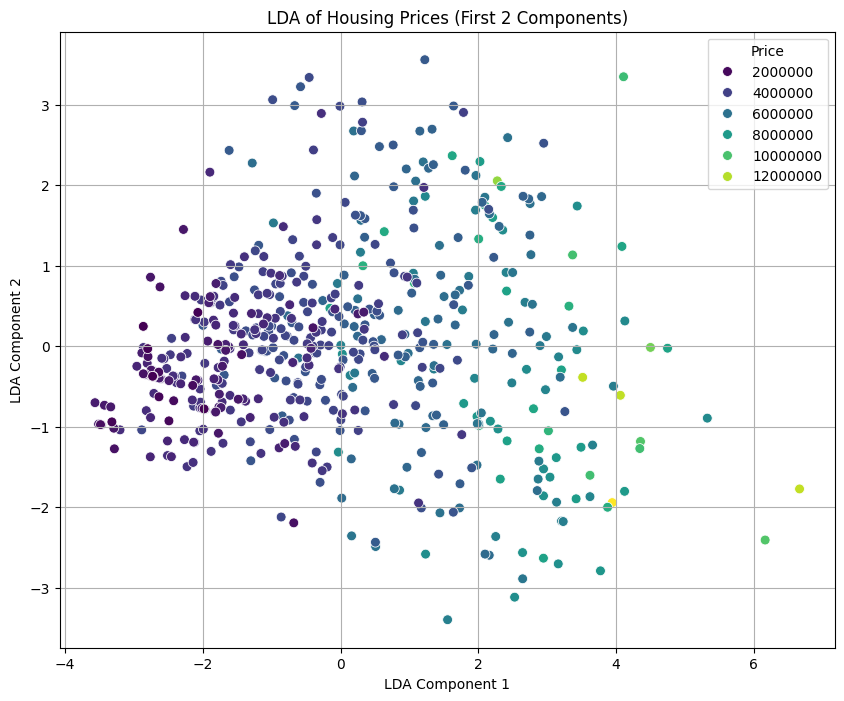

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for the LDA-transformed data and include the target variable
lda_df = pd.DataFrame(X_lda[:, :2], columns=['LDA Component 1', 'LDA Component 2'])
lda_df['price'] = y

# Create a scatter plot of the first two LDA components, colored by the target variable
plt.figure(figsize=(10, 8))
sns.scatterplot(x='LDA Component 1', y='LDA Component 2', hue='price', data=lda_df, palette='viridis', s=50)
plt.title('LDA of Housing Prices (First 2 Components)')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend(title='Price')
plt.grid(True)
plt.show()